In [2]:
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("vaswani-fourfold/results.csv")

df.columns = df.columns.str.strip()

gamma = 0.1 # Change if needed

# Compute trade-off score
df["tradeoff_score"] = df["map"] - gamma * df["mrt"]
label_map = {
    "BM25": "BM25",
    "BM25_RM3_COLBERT_ANCE": "RM3 → ColBERT → ANCE",
    "BM25_RM3_ANCE_COLBERT": "RM3 → ANCE → ColBERT",
    "BM25_COLBERT_RM3_ANCE": "ColBERT → RM3 → ANCE",
    "BM25_COLBERT_ANCE_RM3": "ColBERT → ANCE → RM3",
    "BM25_ANCE_RM3_COLBERT": "ANCE → RM3 → ColBERT",
    "BM25_ANCE_COLBERT_RM3": "ANCE → ColBERT → RM3"
}

df["label"] = df["name"].map(label_map)

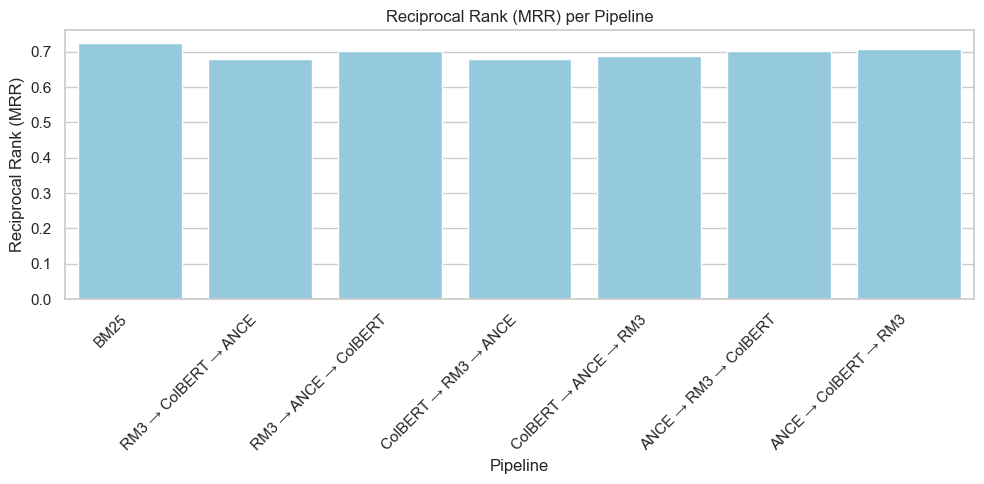

In [6]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid", font_scale=1.0)
sns.barplot(data=df, x="label", y="recip_rank", color="skyblue")

plt.title("Reciprocal Rank (MRR) per Pipeline")
plt.xlabel("Pipeline")
plt.ylabel("Reciprocal Rank (MRR)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

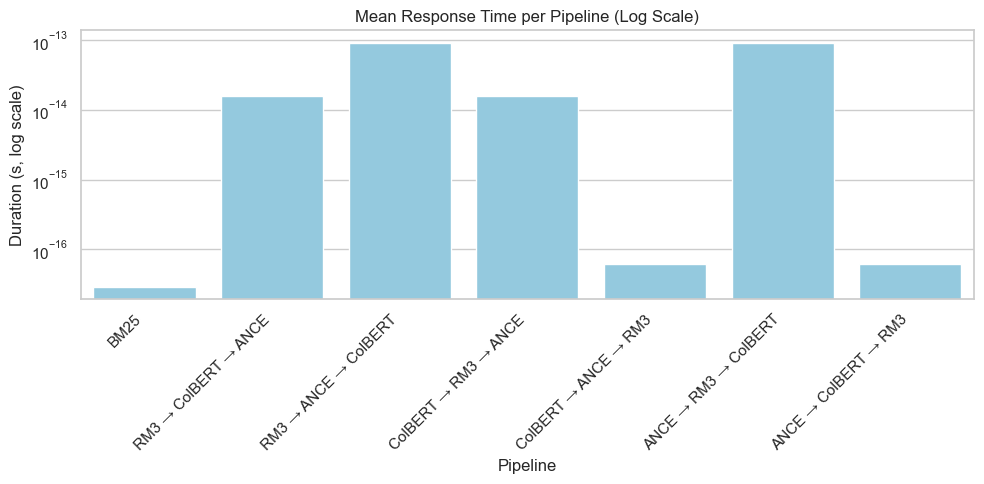

In [13]:
df["mrt"] = df["mrt"] / 1000

# Drop missing MRT values
df_clean = df.dropna(subset=["mrt"])

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid", font_scale=1.0)
sns.barplot(data=df_clean, x="label", y="mrt", color="skyblue")

plt.yscale("log")
plt.title("Mean Response Time per Pipeline (Log Scale)")
plt.xlabel("Pipeline")
plt.ylabel("Duration (s, log scale)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


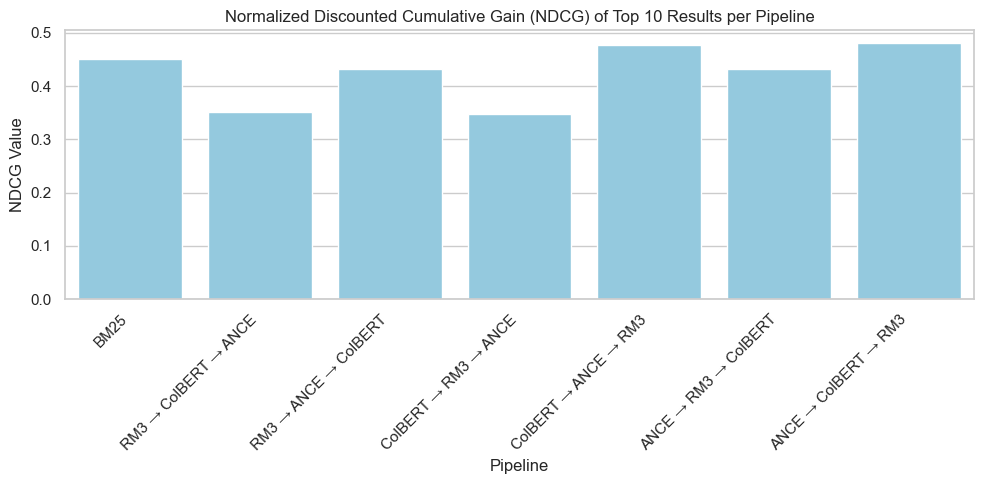

In [14]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid", font_scale=1.0)
sns.barplot(data=df, x="label", y="ndcg_cut_10", color="skyblue")

plt.title("Normalized Discounted Cumulative Gain (NDCG) of Top 10 Results per Pipeline")
plt.xlabel("Pipeline")
plt.ylabel("NDCG Value")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

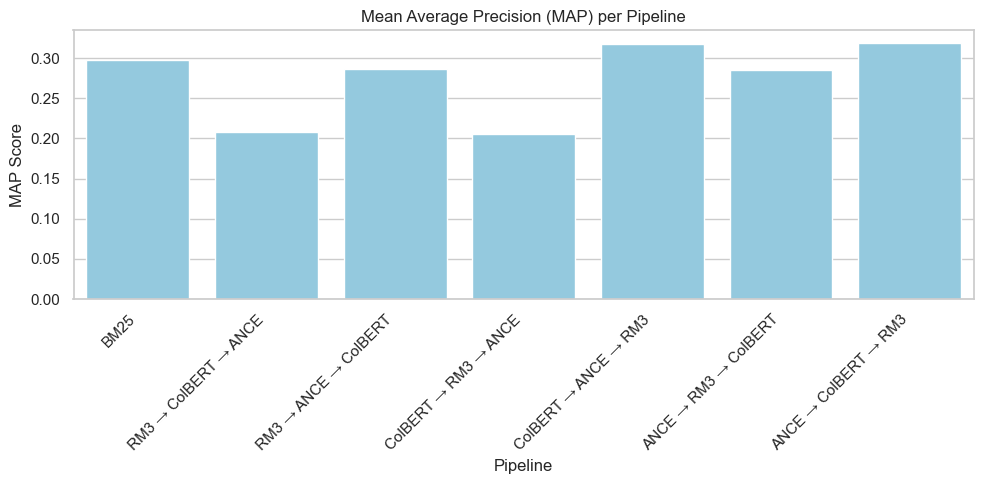

In [15]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid", font_scale=1.0)
sns.barplot(data=df, x="label", y="map", color="skyblue")

plt.title("Mean Average Precision (MAP) per Pipeline")
plt.xlabel("Pipeline")
plt.ylabel("MAP Score")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

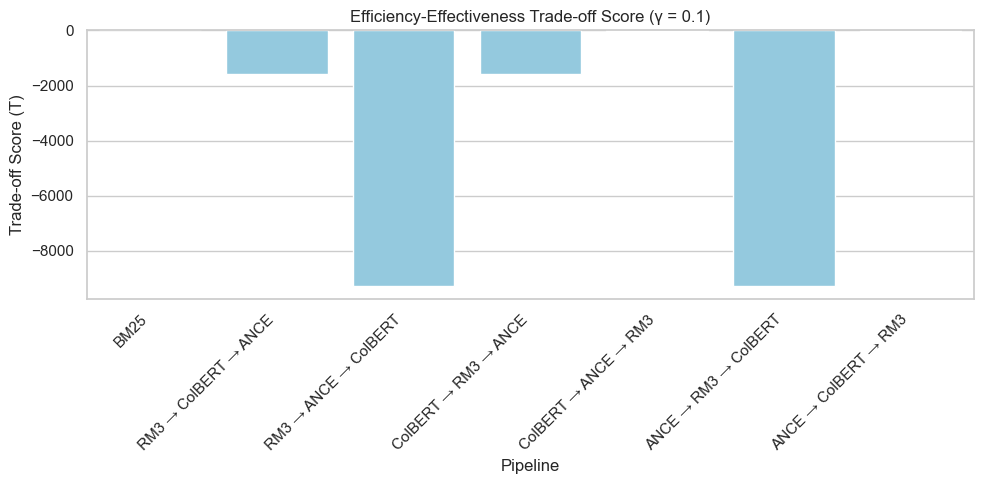

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="label", y="tradeoff_score", color="skyblue")
plt.title(f"Efficiency-Effectiveness Trade-off Score (γ = {gamma})")
plt.xlabel("Pipeline")
plt.ylabel("Trade-off Score (T)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

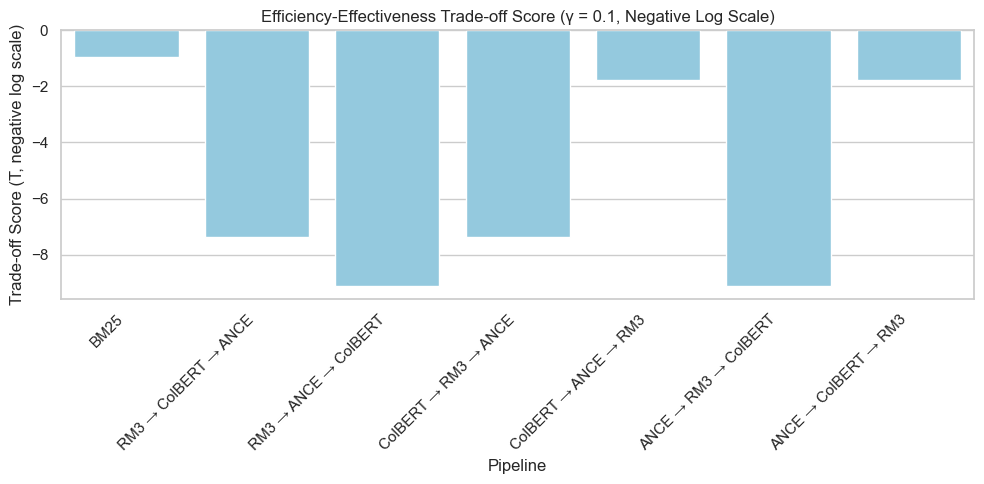

In [5]:
import numpy as np

df["tradeoff_score_neg"] = -df["tradeoff_score"]
df["tradeoff_score_log"] = np.log(df["tradeoff_score_neg"])
df["tradeoff_score_log_neg"] = - df["tradeoff_score_log"]

plt.figure(figsize=(10, 5))
sns.set(style="whitegrid", font_scale=1.0)
sns.barplot(data=df, x="label", y="tradeoff_score_log_neg", color="skyblue")
plt.title(f"Efficiency-Effectiveness Trade-off Score (γ = {gamma}, Negative Log Scale)")
plt.xlabel("Pipeline")
plt.ylabel("Trade-off Score (T, negative log scale)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()